alpha = 0.5, gamma = 0.99: Final success rate of Q-Learning: 62.7% 


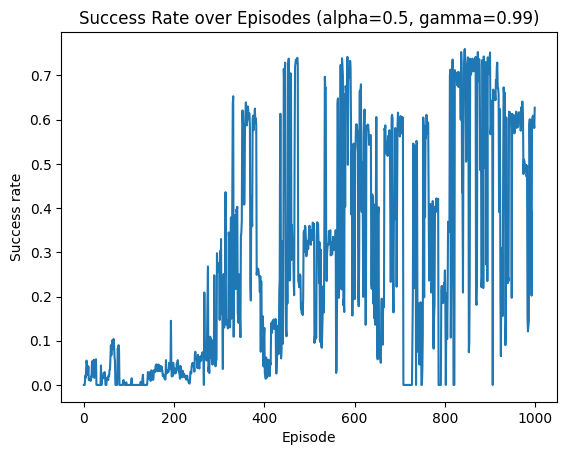

In [13]:
import gym
import numpy as np
import matplotlib.pyplot as plt

def testPolicy(policy, env, trials=1000):
#Get the average rate of successful episodes over given number of trials

    success = 0
    for _ in range(trials):
        done = False
        state = env.reset()
        while not done:
            action = policy[state]
            state, _, done, _ = env.step(action)
            if state == env.observation_space.n - 1:
                success += 1

    avg_success_rate = success / trials
    return avg_success_rate

def epsilonGreedyExplore(env, state, Q_table, e, episodes):
#epsilon-greedy exploration strategy

    prob = 1 - e / episodes
    if np.random.rand() < prob:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q_table[state, :])
    return action

def softmaxExplore(env, state, Q_table, tau=1):
#Softmax exploration strategy

    num_action = env.action_space.n
    action_prob = np.exp(Q_table[state, :] / tau) / np.sum(np.exp(Q_table[state, :] / tau))
    action = np.random.choice(np.arange(num_action), p=action_prob)
    return action

def Qlearning(env, alpha, gamma, episodes=1000, evaluate_policy=True, strategy="epsilon-greedy"):

    num_state = env.observation_space.n
    num_action = env.action_space.n
    Q_table = np.random.rand(num_state, num_action)
    success_rate = []
    policy = np.zeros(num_state, dtype=int)

    for i in range(episodes):
        state = env.reset()
        done = False
        while not done:
            if strategy == "epsilon-greedy":
                action = epsilonGreedyExplore(env, state, Q_table, i, episodes)
            else:
                action = softmaxExplore(env, state, Q_table)

            new_state, reward, done, _ = env.step(action)
            Q_table[state][action] += alpha * (
                reward + gamma * np.max(Q_table[new_state, :]) - Q_table[state][action]
            )
            state = new_state

        policy = np.argmax(Q_table, axis=1)
        success_rate.append(testPolicy(policy, env))

    return policy, success_rate

def plot(success_rate, title):

    plt.figure()
    plt.plot(success_rate)
    plt.title(title)
    plt.xlabel("Episode")
    plt.ylabel("Success rate")
    plt.savefig(title + ".png", dpi=150)
    plt.show()

if __name__ == "__main__":
    env = gym.make("FrozenLake-v1", is_slippery=True)
    alpha = 0.5
    gamma = 0.99
    episodes = 1000

    policy, success_rate = Qlearning(env, alpha=alpha, gamma=gamma, episodes=episodes)

    print(f"alpha = {alpha}, gamma = {gamma}: Final success rate of Q-Learning: {success_rate[-1] * 100:.1f}% ")
    plot(success_rate, f"Success Rate over Episodes (alpha={alpha}, gamma={gamma})")